In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/urls.csv")
data = data.drop(["Domain"],axis = 1)
data.head()

,Unnamed: 0,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [3]:
data.drop(data.columns[data.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
data.head()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1
1,0,0,1,3,0,0,0,0,0,1,1,1,1,1,1,0
2,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,1
3,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1


In [4]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
data.columns

Index(['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',
       'Label'],
      dtype='object')

In [7]:
y = data.Label
X_cols = ['Have_IP', 'Have_At', 'URL_Length', 'URL_Depth', 'Redirection',
       'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'iFrame', 'Mouse_Over', 'Right_Click', 'Web_Forwards',]
X = data[X_cols]
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
clf = MLPClassifier(hidden_layer_sizes=(15,5),random_state=5,verbose=True,learning_rate_init=0.01)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
print("accuracy score of mlp :",accuracy_score(y_test,y_pred))

Iteration 1, loss = 0.58299006
Iteration 2, loss = 0.40599997
Iteration 3, loss = 0.32384739
Iteration 4, loss = 0.28391707
Iteration 5, loss = 0.25494548
Iteration 6, loss = 0.22881773
Iteration 7, loss = 0.21179024
Iteration 8, loss = 0.20201406
Iteration 9, loss = 0.19757918
Iteration 10, loss = 0.18964491
Iteration 11, loss = 0.18593642
Iteration 12, loss = 0.18373381
Iteration 13, loss = 0.18320411
Iteration 14, loss = 0.18012640
Iteration 15, loss = 0.18102819
Iteration 16, loss = 0.17629731
Iteration 17, loss = 0.17511733
Iteration 18, loss = 0.17660819
Iteration 19, loss = 0.17295426
Iteration 20, loss = 0.17082518
Iteration 21, loss = 0.17010508
Iteration 22, loss = 0.17388088
Iteration 23, loss = 0.16788896
Iteration 24, loss = 0.16878995
Iteration 25, loss = 0.16853192
Iteration 26, loss = 0.16404526
Iteration 27, loss = 0.16209467
Iteration 28, loss = 0.15899310
Iteration 29, loss = 0.15767905
Iteration 30, loss = 0.15663333
Iteration 31, loss = 0.15634634
Iteration 32, los

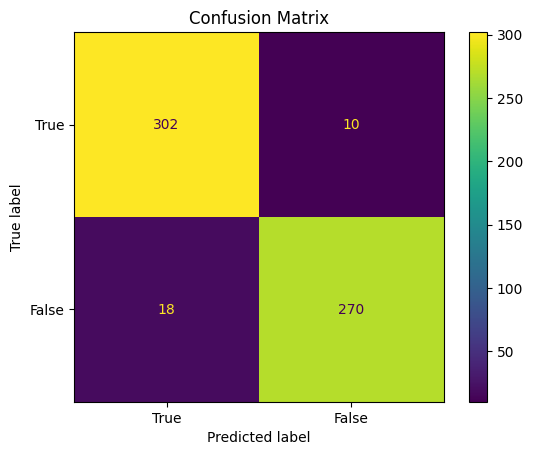

In [9]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
cnf_matrix = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(confusion_matrix  = cnf_matrix,display_labels = [True, False]).plot()
plt.title('Confusion Matrix')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
